# Mushroom dataset
### Playing around with encoders and feature selection



In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import validation_curve, train_test_split

## Preparing data

In [3]:
data = pd.read_csv('data/mushrooms.csv')

In [4]:
data['target'] = pd.get_dummies(data['class'], drop_first=True)['p']

In [5]:
FEATURES = list(data.columns)
FEATURES.remove('class')
FEATURES.remove('target')
print('FEATURES = {}'.format(FEATURES))

FEATURES = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [7]:
X = data[FEATURES]
y = data['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Example with OneHotEncoder

In [50]:
pipe = make_pipeline(
    ce.OneHotEncoder(),
    SelectKBest(chi2, k=60),
    LogisticRegression(C=1)
)

In [51]:
pipe.get_params()

{'memory': None,
 'steps': [('onehotencoder', OneHotEncoder()),
  ('selectkbest',
   SelectKBest(k=60, score_func=<function chi2 at 0x7fb6f7eb78b0>)),
  ('logisticregression', LogisticRegression(C=1))],
 'verbose': False,
 'onehotencoder': OneHotEncoder(),
 'selectkbest': SelectKBest(k=60, score_func=<function chi2 at 0x7fb6f7eb78b0>),
 'logisticregression': LogisticRegression(C=1),
 'onehotencoder__cols': None,
 'onehotencoder__drop_invariant': False,
 'onehotencoder__handle_missing': 'value',
 'onehotencoder__handle_unknown': 'value',
 'onehotencoder__return_df': True,
 'onehotencoder__use_cat_names': False,
 'onehotencoder__verbose': 0,
 'selectkbest__k': 60,
 'selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>,
 'logisticregression__C': 1,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': 

In [44]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['cap-shape', 'cap-surface', 'cap-color',
                                     'bruises', 'odor', 'gill-attachment',
                                     'gill-spacing', 'gill-size', 'gill-color',
                                     'stalk-shape', 'stalk-root',
                                     'stalk-surface-above-ring',
                                     'stalk-surface-below-ring',
                                     'stalk-color-above-ring',
                                     'stalk-color-below-ring', 'veil-type',
                                     'veil-color', 'ring-number', 'ring-type',
                                     'spore-print-color', 'population',
                                     'habitat'])),
                ('selectkbest',
                 SelectKBest(k=60,
                             score_func=<function chi2 at 0x7fb6f7eb78b0>)),
                ('logisticregression', LogisticRegre

In [45]:
y_pred_test = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

In [46]:
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
print(recall_train)
print(recall_test)

0.9989165763813651
0.997384481255449


In [47]:
score_train = pipe.score(X_train, y_train)
score_test = pipe.score(X_test, y_test)
print(score_train)
print(score_test)

0.9994723883221949
0.9987694831829368


Text(0, 0.5, 'recall')

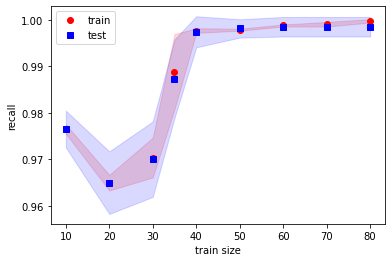

In [57]:
param_range = [10, 20, 30, 35, 40, 50, 60, 70, 80]
train_scores, test_scores = validation_curve(
        estimator=pipe,
        X=X_train,
        y=y_train,
        param_name='selectkbest__k',
        param_range=param_range,
        cv=5,
        scoring='recall'
    )
train_score_mean = np.mean(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
    
COLORS = {'train': 'r', 'test': 'b'}
ax = plt.gca()

ax.plot(param_range, train_score_mean, color=COLORS['train'], linestyle='none',
        marker='o', label='train')
ax.fill_between(param_range, train_score_mean + train_score_std,
                 train_score_mean - train_score_std, alpha=0.15,
                 color=COLORS['train'])
ax.plot(param_range, test_score_mean, color=COLORS['test'], linestyle='none',
        marker='s', label='test')
ax.fill_between(param_range, test_score_mean + test_score_std,
                 test_score_mean - test_score_std, alpha=0.15,
                 color=COLORS['test'])
ax.legend()
ax.set_xlabel('k')
ax.set_ylabel('recall')